In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/arghyam_project/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
arghyam_od.ipynb		train3
bfm_classification.ipynb	water_meter2
classification_data		water_meter2.zip
classification_data_binary.zip	yolo_final_data
classification_data.zip		yolo_final_data_indivisual_numbers
__MACOSX			yolo_final_data_indivisual_numbers.zip
train				yolo_final_data.zip


In [2]:
import zipfile

# Specify the path to your zip file
zip_path = "/content/drive/MyDrive/arghyam_project/classification_data_binary.zip"

# Specify the directory where you want to extract the contents of the zip file
extract_path = "/content/drive/MyDrive/arghyam_project/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Zip file extracted successfully.


In [3]:
!pip install fastai -q --upgrade
!pip install -Uqq fastai duckduckgo_search
! [ -e /content ] && pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [4]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *

In [5]:
damage_types = 'bad', 'good'
path = Path('/content/drive/MyDrive/arghyam_project/classification_data_binary')

In [6]:
fns = get_image_files(path)
fns

(#2160) [Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909125900_C2272079_F0_M7738960.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909200252_C2268426_F21369_M7727188.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909165400_C2272132_F0_M7830211.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909200624_C2272113_F21369_M7771790.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909200315_C2272138_F21369_M7733405.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909171600_C2272196_F21369_M7841957.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/20240909133700_C2272089_F21369_M7751327.png'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad/field_1711.jpeg'),Path('/content/drive/MyDrive/arghyam_project/classi

In [7]:
path.ls()

(#3) [Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/.DS_Store'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/bad'),Path('/content/drive/MyDrive/arghyam_project/classification_data_binary/good')]

In [8]:
failed = verify_images(fns)
failed ,len(failed)

((#0) [], 0)

In [9]:
failed.map(Path.unlink)

(#0) []

In [10]:
damage_classifier = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [11]:
dls_damage = damage_classifier.dataloaders(path)

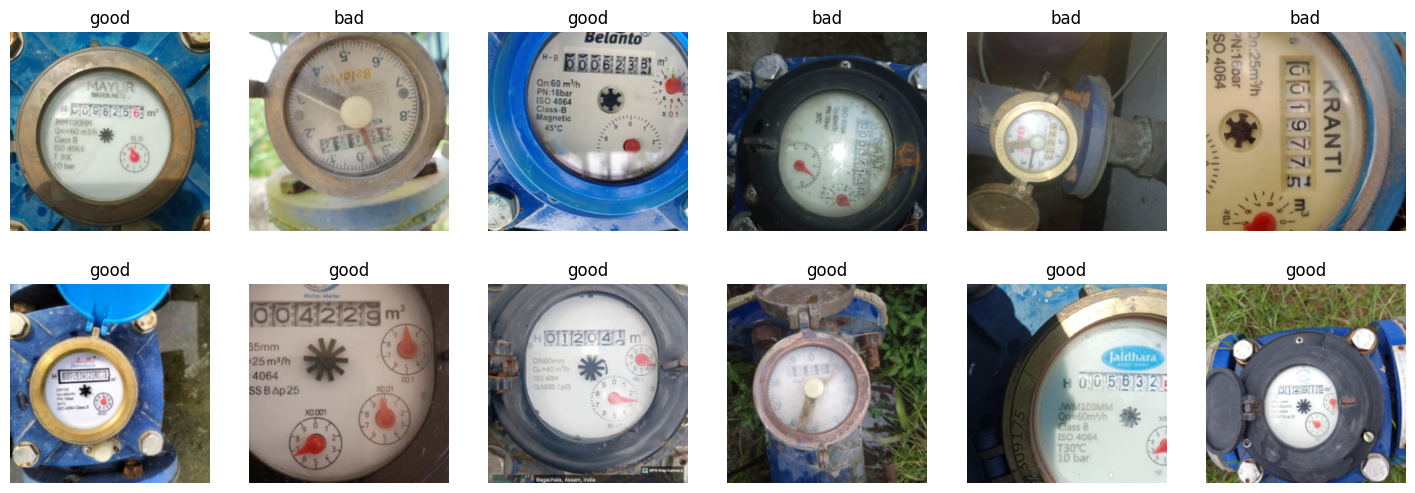

In [12]:
dls_damage.valid.show_batch(max_n=12, nrows=2)

In [ ]:
damage_classifier = damage_classifier.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = damage_classifier.dataloaders(path)

In [ ]:
dls.add_tfms]l

<bound method DataLoaders.add_tfms of <fastai.data.core.DataLoaders object at 0x7b26b30d01d0>>

In [ ]:
learn = vision_learner(dls_damage, resnet50, metrics=error_rate)
learn.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.5MB/s]


epoch,train_loss,valid_loss,error_rate,time


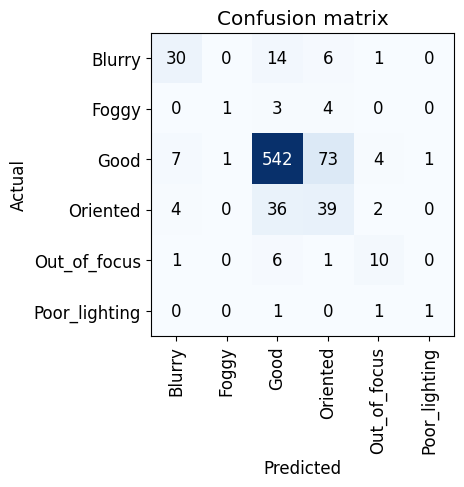

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

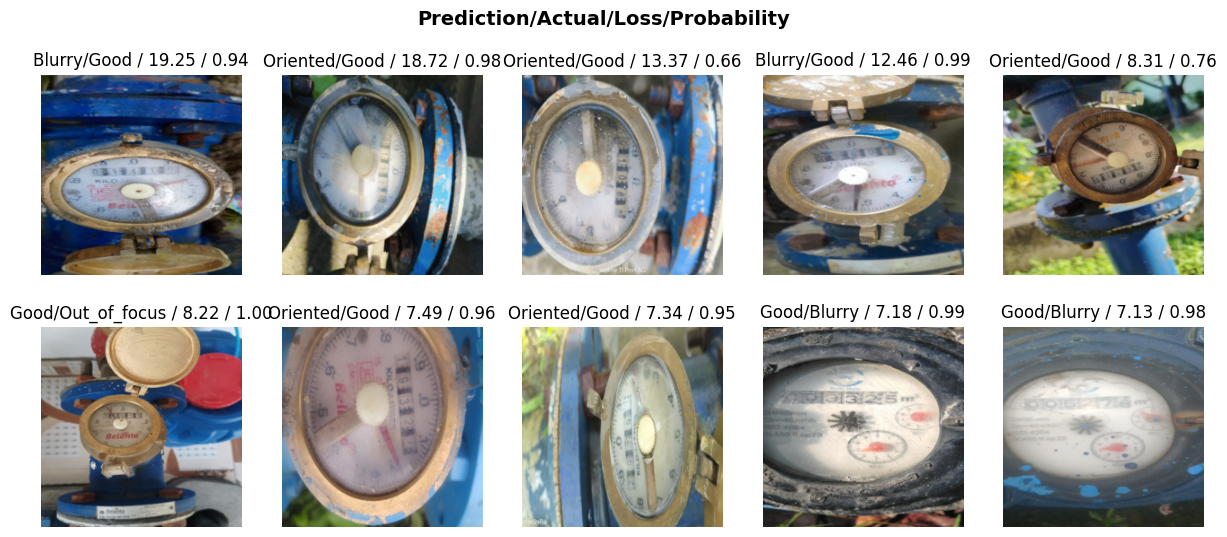

In [ ]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
interp.show_results

<bound method Interpretation.show_results of <fastai.interpret.ClassificationInterpretation object at 0x7b26b30d0390>>

In [ ]:
interp.print_classification_report()

               precision    recall  f1-score   support

       Blurry       0.71      0.59      0.65        51
        Foggy       0.50      0.12      0.20         8
         Good       0.90      0.86      0.88       628
     Oriented       0.32      0.48      0.38        81
 Out_of_focus       0.56      0.56      0.56        18
Poor_lighting       0.50      0.33      0.40         3

     accuracy                           0.79       789
    macro avg       0.58      0.49      0.51       789
 weighted avg       0.81      0.79      0.80       789



In [ ]:
import pandas as pd


def get_misclassified_images_to_csv(learn, output_path='misclassified_images.csv'):
    interp = ClassificationInterpretation.from_learner(learn)

    # Get predictions with probabilities (using softmax activation)
    probs, targs, decoded = learn.get_preds(dl=interp.dl, with_decoded=True,
                                          with_preds=True, with_targs=True)

    # Get losses and indices
    losses, indices = interp.top_losses(k=None)

    data = {
        'image_path': [],
        'true_label': [],
        'predicted_label': [],
        'prediction_probability': [],  # Adding probability
        'loss': []
    }

    for idx, loss in zip(indices, losses):
        if decoded[idx] != targs[idx]:  # Only include misclassified
            # Get the probability of the predicted class
            pred_prob = probs[idx].max().item()  # Gets the highest probability

            data['image_path'].append(str(interp.dl.items[idx]))
            data['true_label'].append(interp.vocab[targs[idx].item()])
            data['predicted_label'].append(interp.vocab[decoded[idx].item()])
            data['prediction_probability'].append(f"{pred_prob:.4f}")  # Format to 4 decimal places
            data['loss'].append(f"{loss.item():.4f}")

    # Create DataFrame and sort by loss
    df = pd.DataFrame(data)
    df = df.sort_values('loss', ascending=False)

    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"Saved misclassified images information to {output_path}")

    return df


# Usage:
df = get_misclassified_images_to_csv(learn, 'misclassified_images.csv')

# You can also view the first few entries
print("\nFirst few misclassifications:")
print(df.head())

Saved misclassified images information to misclassified_images.csv

First few misclassifications:
                                                                                                    image_path  \
5                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_821.jpeg   
6  /content/drive/MyDrive/arghyam_project/classification_data/Good/20240909172201_C2272071_F21369_M7846222.png   
7                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_338.jpeg   
8                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_162.jpeg   
9                       /content/drive/MyDrive/arghyam_project/classification_data/Out_of_focus/field_437.jpeg   

     true_label predicted_label prediction_probability    loss  
5          Good        Oriented                 0.9807  9.7080  
6          Good          Blurry                 0.9957  9.3789  
7          Good       

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:

for idx in cleaner.delete():
  cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

<bound method ImagesCleaner.values of <fastai.vision.widgets.ImagesCleaner object at 0x7b265e3aa290>>

In [ ]:
learn.save('stage_1')

Path('models/stage_1.pth')

In [ ]:
learn.load('stage_1')

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy._core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([scalar])` or the `torch.serialization.safe_globals([scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.098867,0.539570,0.092593,01:07
1,0.105338,0.533930,0.087963,01:05
2,0.106225,0.543552,0.087963,01:02
3,0.106158,0.545303,0.085648,01:06
4,0.103277,0.534808,0.090278,01:06
5,0.100916,0.545717,0.090278,01:09
6,0.102788,0.557373,0.087963,01:05
7,0.090438,0.563507,0.090278,01:05
8,0.087134,0.552397,0.087963,01:04
9,0.088574,0.559645,0.090278,01:01


In [ ]:
learn.save('stage_2')

Path('models/stage_2.pth')

In [ ]:
learn.export("damaged_notdamaged_fastai")

In [ ]:
label_,a,probs = learn.predict('/content/drive/MyDrive/car_damage_fastai/car_damaged/damage/0714.JPEG')
print(f"This is a: {label_}.")
print(f"Probability it is a {label_} : { probs[int(a.numpy())]:.4f} ")

This is a: damage.
Probability it is a damage : 1.0000 


In [ ]:
!cp -r /content/models/stage_2.pth /content/drive/MyDrive/car_damage_fastai/

In [ ]:
!cp -r /content/damaged_notdamaged_fastai /content/drive/MyDrive/car_damage_fastai/